In [194]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/knee-replacement/knee_replacement.csv


In [195]:
df = pd.read_csv('../input/knee-replacement/knee_replacement.csv')
df.head()

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,Health Service Area,Hospital County,Operating Certificate Number,Facility Id,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,...,Payment Typology 3,Attending Provider License Number,Operating Provider License Number,Other Provider License Number,Birth Weight,Abortion Edit Indicator,Emergency Department Indicator,Total Charges,Total Costs,Ratio of Total Costs to Total Charges
0,35,Western NY,Allegany,228000.0,39.0,Memorial Hosp of Wm F & Gertrude F Jones A/K/A...,50 to 69,148,M,White,...,Self-Pay,213053.0,213053.0,NaN,0,N,N,23344.75,11281.89,0.483273
1,36,Western NY,Allegany,228000.0,39.0,Memorial Hosp of Wm F & Gertrude F Jones A/K/A...,50 to 69,148,F,White,...,Self-Pay,213053.0,213053.0,NaN,0,N,N,25154.00,12415.67,0.493586
2,101,Western NY,Allegany,228000.0,39.0,Memorial Hosp of Wm F & Gertrude F Jones A/K/A...,50 to 69,148,F,White,...,Self-Pay,213053.0,213053.0,NaN,0,N,N,29389.50,14873.56,0.506084
3,103,Western NY,Allegany,228000.0,39.0,Memorial Hosp of Wm F & Gertrude F Jones A/K/A...,50 to 69,148,M,White,...,Private Health Insurance,213053.0,213053.0,NaN,0,N,N,25029.50,12402.49,0.495515
4,106,Western NY,Allegany,228000.0,39.0,Memorial Hosp of Wm F & Gertrude F Jones A/K/A...,70 or Older,148,F,White,...,Self-Pay,213053.0,213053.0,NaN,0,N,N,28976.00,14547.43,0.502051


In [196]:
df.columns

Index(['Unnamed: 0', 'Health Service Area', 'Hospital County',
       'Operating Certificate Number', 'Facility Id', 'Facility Name',
       'Age Group', 'Zip Code - 3 digits', 'Gender', 'Race', 'Ethnicity',
       'Length of Stay', 'Type of Admission', 'Patient Disposition',
       'Discharge Year', 'CCS Diagnosis Code', 'CCS Diagnosis Description',
       'CCS Procedure Code', 'CCS Procedure Description', 'APR DRG Code',
       'APR DRG Description', 'APR MDC Code', 'APR MDC Description',
       'APR Severity of Illness Code', 'APR Severity of Illness Description',
       'APR Risk of Mortality', 'APR Medical Surgical Description',
       'Payment Typology 1', 'Payment Typology 2', 'Payment Typology 3',
       'Attending Provider License Number',
       'Operating Provider License Number', 'Other Provider License Number',
       'Birth Weight', 'Abortion Edit Indicator',
       'Emergency Department Indicator', 'Total Charges', 'Total Costs',
       'Ratio of Total Costs to Total Cha

In [197]:
df = df.drop(['Unnamed: 0', 'Health Service Area', 'Hospital County','Operating Certificate Number', 'Facility Id','CCS Diagnosis Code','CCS Procedure Code','APR DRG Code','APR MDC Description','APR Severity of Illness Code','Payment Typology 2', 'Payment Typology 3',
       'Attending Provider License Number','Operating Provider License Number', 'Other Provider License Number','Zip Code - 3 digits','Race', 'Ethnicity'],axis=1)
df.head()

,Facility Name,Age Group,Gender,Length of Stay,Type of Admission,Patient Disposition,Discharge Year,CCS Diagnosis Description,CCS Procedure Description,APR DRG Description,...,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Birth Weight,Abortion Edit Indicator,Emergency Department Indicator,Total Charges,Total Costs,Ratio of Total Costs to Total Charges
0,Memorial Hosp of Wm F & Gertrude F Jones A/K/A...,50 to 69,M,3,Elective,Home or Self Care,2016,Osteoarthritis,ARTHROPLASTY KNEE,Knee joint replacement,...,Minor,Minor,Surgical,Private Health Insurance,0,N,N,23344.75,11281.89,0.483273
1,Memorial Hosp of Wm F & Gertrude F Jones A/K/A...,50 to 69,F,4,Elective,Home w/ Home Health Services,2016,Osteoarthritis,ARTHROPLASTY KNEE,Knee joint replacement,...,Minor,Minor,Surgical,Blue Cross/Blue Shield,0,N,N,25154.00,12415.67,0.493586
2,Memorial Hosp of Wm F & Gertrude F Jones A/K/A...,50 to 69,F,6,Elective,Home w/ Home Health Services,2016,Osteoarthritis,ARTHROPLASTY KNEE,Knee joint replacement,...,Minor,Minor,Surgical,Medicare,0,N,N,29389.50,14873.56,0.506084
3,Memorial Hosp of Wm F & Gertrude F Jones A/K/A...,50 to 69,M,4,Elective,Skilled Nursing Home,2016,Osteoarthritis,ARTHROPLASTY KNEE,Knee joint replacement,...,Moderate,Moderate,Surgical,Medicare,0,N,N,25029.50,12402.49,0.495515
4,Memorial Hosp of Wm F & Gertrude F Jones A/K/A...,70 or Older,F,6,Elective,Home w/ Home Health Services,2016,Osteoarthritis,ARTHROPLASTY KNEE,Knee joint replacement,...,Minor,Minor,Surgical,Medicare,0,N,N,28976.00,14547.43,0.502051


In [198]:
df.columns

Index(['Facility Name', 'Age Group', 'Gender', 'Length of Stay',
       'Type of Admission', 'Patient Disposition', 'Discharge Year',
       'CCS Diagnosis Description', 'CCS Procedure Description',
       'APR DRG Description', 'APR MDC Code',
       'APR Severity of Illness Description', 'APR Risk of Mortality',
       'APR Medical Surgical Description', 'Payment Typology 1',
       'Birth Weight', 'Abortion Edit Indicator',
       'Emergency Department Indicator', 'Total Charges', 'Total Costs',
       'Ratio of Total Costs to Total Charges'],
      dtype='object')

In [199]:
df.nunique()

Facility Name                              159
Age Group                                    5
Gender                                       2
Length of Stay                              77
Type of Admission                            6
Patient Disposition                         19
Discharge Year                               1
CCS Diagnosis Description                   23
CCS Procedure Description                   37
APR DRG Description                          1
APR MDC Code                                 1
APR Severity of Illness Description          4
APR Risk of Mortality                        4
APR Medical Surgical Description             1
Payment Typology 1                          10
Birth Weight                                 1
Abortion Edit Indicator                      1
Emergency Department Indicator               2
Total Charges                            39425
Total Costs                              39541
Ratio of Total Costs to Total Charges    39118
dtype: int64

In [200]:
df2 = df.drop(['Discharge Year','APR MDC Code','APR DRG Description','Birth Weight','Abortion Edit Indicator'],axis=1)
df2.head()

,Facility Name,Age Group,Gender,Length of Stay,Type of Admission,Patient Disposition,CCS Diagnosis Description,CCS Procedure Description,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Emergency Department Indicator,Total Charges,Total Costs,Ratio of Total Costs to Total Charges
0,Memorial Hosp of Wm F & Gertrude F Jones A/K/A...,50 to 69,M,3,Elective,Home or Self Care,Osteoarthritis,ARTHROPLASTY KNEE,Minor,Minor,Surgical,Private Health Insurance,N,23344.75,11281.89,0.483273
1,Memorial Hosp of Wm F & Gertrude F Jones A/K/A...,50 to 69,F,4,Elective,Home w/ Home Health Services,Osteoarthritis,ARTHROPLASTY KNEE,Minor,Minor,Surgical,Blue Cross/Blue Shield,N,25154.00,12415.67,0.493586
2,Memorial Hosp of Wm F & Gertrude F Jones A/K/A...,50 to 69,F,6,Elective,Home w/ Home Health Services,Osteoarthritis,ARTHROPLASTY KNEE,Minor,Minor,Surgical,Medicare,N,29389.50,14873.56,0.506084
3,Memorial Hosp of Wm F & Gertrude F Jones A/K/A...,50 to 69,M,4,Elective,Skilled Nursing Home,Osteoarthritis,ARTHROPLASTY KNEE,Moderate,Moderate,Surgical,Medicare,N,25029.50,12402.49,0.495515
4,Memorial Hosp of Wm F & Gertrude F Jones A/K/A...,70 or Older,F,6,Elective,Home w/ Home Health Services,Osteoarthritis,ARTHROPLASTY KNEE,Minor,Minor,Surgical,Medicare,N,28976.00,14547.43,0.502051


In [201]:
df4['Length of Stay'].unique()

array([21, 29, 40,  5, 36,  3, 45, 12,  0,  7, 41, 13,  1, 46,  6, 35, 27,
        8, 16,  4, 15, 32, 14, 30,  9, 10, 33, 18, 11, 25, 26, 42, 43, 39,
       23, 31,  2, 38, 37, 22, 44, 34, 17, 20, 28, 24, 19])

# label encoder

In [202]:
df4= df2[df2['Length of Stay'] != '120 +']
df4

,Facility Name,Age Group,Gender,Length of Stay,Type of Admission,Patient Disposition,CCS Diagnosis Description,CCS Procedure Description,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Emergency Department Indicator,Total Charges,Total Costs,Ratio of Total Costs to Total Charges
0,Memorial Hosp of Wm F & Gertrude F Jones A/K/A...,50 to 69,M,3,Elective,Home or Self Care,Osteoarthritis,ARTHROPLASTY KNEE,Minor,Minor,Surgical,Private Health Insurance,N,23344.75,11281.89,0.483273
1,Memorial Hosp of Wm F & Gertrude F Jones A/K/A...,50 to 69,F,4,Elective,Home w/ Home Health Services,Osteoarthritis,ARTHROPLASTY KNEE,Minor,Minor,Surgical,Blue Cross/Blue Shield,N,25154.00,12415.67,0.493586
2,Memorial Hosp of Wm F & Gertrude F Jones A/K/A...,50 to 69,F,6,Elective,Home w/ Home Health Services,Osteoarthritis,ARTHROPLASTY KNEE,Minor,Minor,Surgical,Medicare,N,29389.50,14873.56,0.506084
3,Memorial Hosp of Wm F & Gertrude F Jones A/K/A...,50 to 69,M,4,Elective,Skilled Nursing Home,Osteoarthritis,ARTHROPLASTY KNEE,Moderate,Moderate,Surgical,Medicare,N,25029.50,12402.49,0.495515
4,Memorial Hosp of Wm F & Gertrude F Jones A/K/A...,70 or Older,F,6,Elective,Home w/ Home Health Services,Osteoarthritis,ARTHROPLASTY KNEE,Minor,Minor,Surgical,Medicare,N,28976.00,14547.43,0.502051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39819,St Catherine of Siena Hospital,50 to 69,M,2,Elective,Home or Self Care,Complication of device; implant or graft,ARTHROPLASTY KNEE,Minor,Minor,Surgical,Medicare,N,52381.86,11297.91,0.215684
39820,St Catherine of Siena Hospital,50 to 69,M,3,Elective,Skilled Nursing Home,Osteoarthritis,ARTHROPLASTY KNEE,Minor,Minor,Surgical,Miscellaneous/Other,N,88184.77,21499.28,0.243798
39821,St Catherine of Siena Hospital,50 to 69,F,4,Elective,Skilled Nursing Home,Osteoarthritis,ARTHROPLASTY KNEE,Minor,Minor,Surgical,Medicare,N,97762.31,22096.91,0.226027
39822,St Catherine of Siena Hospital,70 or Older,F,3,Elective,Skilled Nursing Home,Osteoarthritis,ARTHROPLASTY KNEE,Minor,Minor,Surgical,Medicare,N,88312.19,21291.71,0.241096


In [203]:
df4 = df4.astype(str)

In [204]:
from sklearn.preprocessing import LabelEncoder

In [205]:
df4.columns

Index(['Facility Name', 'Age Group', 'Gender', 'Length of Stay',
       'Type of Admission', 'Patient Disposition', 'CCS Diagnosis Description',
       'CCS Procedure Description', 'APR Severity of Illness Description',
       'APR Risk of Mortality', 'APR Medical Surgical Description',
       'Payment Typology 1', 'Emergency Department Indicator', 'Total Charges',
       'Total Costs', 'Ratio of Total Costs to Total Charges'],
      dtype='object')

In [206]:
lis = ['Facility Name','Age Group','Type of Admission','Length of Stay','Gender','Patient Disposition','CCS Diagnosis Description',
       'CCS Procedure Description', 'APR Severity of Illness Description',
       'APR Risk of Mortality', 'APR Medical Surgical Description',
       'Payment Typology 1', 'Emergency Department Indicator']
lis

['Facility Name',
 'Age Group',
 'Type of Admission',
 'Length of Stay',
 'Gender',
 'Patient Disposition',
 'CCS Diagnosis Description',
 'CCS Procedure Description',
 'APR Severity of Illness Description',
 'APR Risk of Mortality',
 'APR Medical Surgical Description',
 'Payment Typology 1',
 'Emergency Department Indicator']

In [207]:
for i in lis:
    le = LabelEncoder()
    le.fit(df4[i].drop_duplicates()) 
    df4[i] = le.transform(df4[i])
df4.head()

,Facility Name,Age Group,Gender,Length of Stay,Type of Admission,Patient Disposition,CCS Diagnosis Description,CCS Procedure Description,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Emergency Department Indicator,Total Charges,Total Costs,Ratio of Total Costs to Total Charges
0,62,3,1,21,0,7,10,2,2,2,0,7,0,23344.75,11281.89,0.4832731229999999
1,62,3,0,29,0,8,10,2,2,2,0,0,0,25154.0,12415.67,0.4935862789999999
2,62,3,0,40,0,8,10,2,2,2,0,5,0,29389.5,14873.56,0.506084224
3,62,3,1,29,0,18,10,2,3,3,0,5,0,25029.5,12402.49,0.4955148579999999
4,62,4,0,40,0,8,10,2,2,2,0,5,0,28976.0,14547.43,0.502051108


<AxesSubplot:>

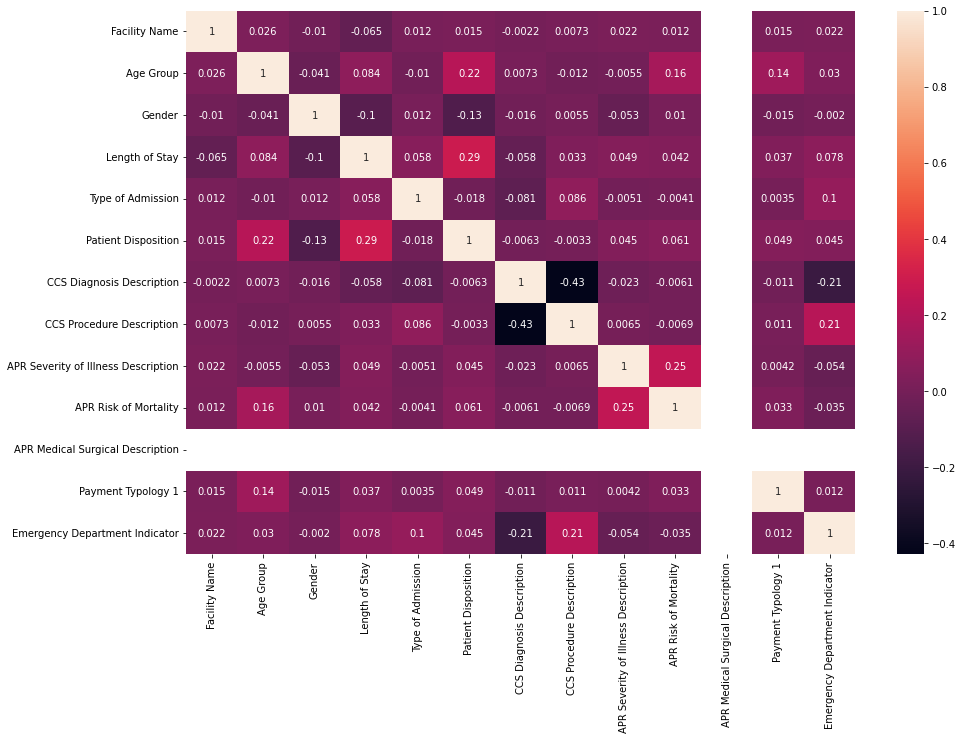

In [208]:
import seaborn as sb
import matplotlib.pyplot as plt
data_corr = df4.corr() #corelation between different variables

f, ax = plt.subplots(figsize=(15, 10)) #setting the figure size
sb.heatmap(data_corr,annot=True) #map the corleation values into heatmap

# normalisation

In [209]:
df4.shape

(39823, 16)

## for predicting total charges

In [210]:
df3 = df4.drop(['Total Charges','Total Costs','Ratio of Total Costs to Total Charges','Patient Disposition','Gender'],axis=1)
df3.head()

,Facility Name,Age Group,Length of Stay,Type of Admission,CCS Diagnosis Description,CCS Procedure Description,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Emergency Department Indicator
0,62,3,21,0,10,2,2,2,0,7,0
1,62,3,29,0,10,2,2,2,0,0,0
2,62,3,40,0,10,2,2,2,0,5,0
3,62,3,29,0,10,2,3,3,0,5,0
4,62,4,40,0,10,2,2,2,0,5,0


In [211]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39823 entries, 0 to 39823
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   Facility Name                        39823 non-null  int64
 1   Age Group                            39823 non-null  int64
 2   Length of Stay                       39823 non-null  int64
 3   Type of Admission                    39823 non-null  int64
 4   CCS Diagnosis Description            39823 non-null  int64
 5   CCS Procedure Description            39823 non-null  int64
 6   APR Severity of Illness Description  39823 non-null  int64
 7   APR Risk of Mortality                39823 non-null  int64
 8   APR Medical Surgical Description     39823 non-null  int64
 9   Payment Typology 1                   39823 non-null  int64
 10  Emergency Department Indicator       39823 non-null  int64
dtypes: int64(11)
memory usage: 3.6 MB


<AxesSubplot:>

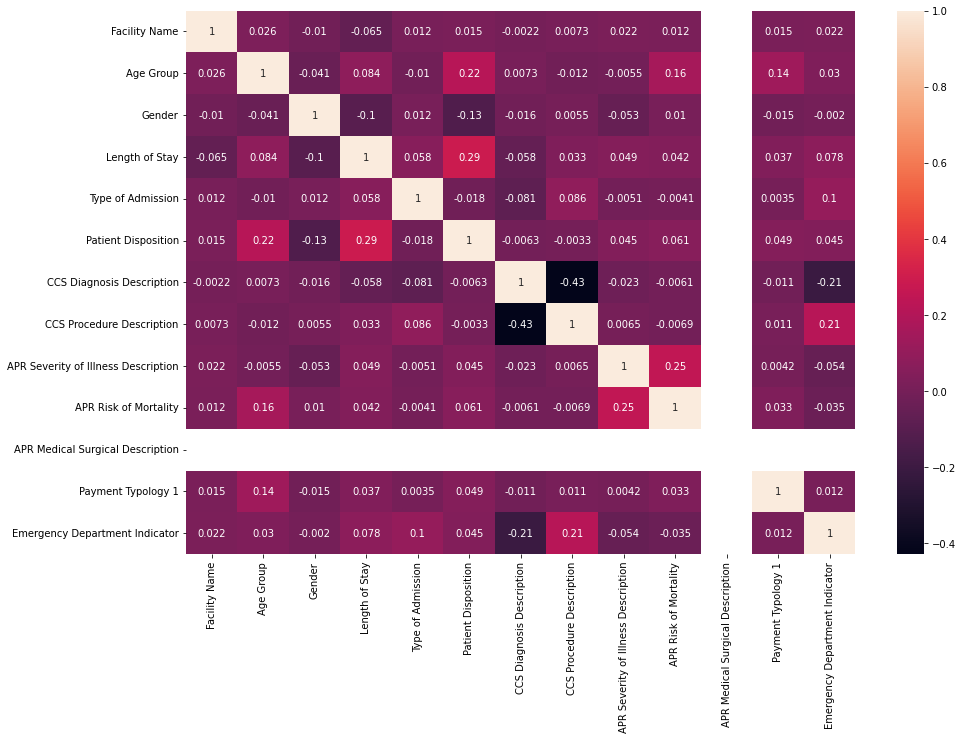

In [212]:
import seaborn as sb
import matplotlib.pyplot as plt
data_corr = df4.corr() #corelation between different variables

f, ax = plt.subplots(figsize=(15, 10)) #setting the figure size
sb.heatmap(data_corr,annot=True) #map the corleation values into heatmap

In [214]:
x = df3.values #rows 0 to 10 are our feature vectors on the basis of which the target is to be determined
y = df4['Total Charges'] #row 11 is our target
print(x.shape)
print(y.shape)
print(x)

(39823, 11)
(39823,)
[[ 62   3  21 ...   0   7   0]
 [ 62   3  29 ...   0   0   0]
 [ 62   3  40 ...   0   5   0]
 ...
 [126   3  29 ...   0   5   0]
 [126   4  21 ...   0   5   0]
 [126   3  29 ...   0   4   0]]


In [215]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler() 
x = ms.fit_transform(x) 
print(x)

[[0.39240506 0.75       0.45652174 ... 0.         0.77777778 0.        ]
 [0.39240506 0.75       0.63043478 ... 0.         0.         0.        ]
 [0.39240506 0.75       0.86956522 ... 0.         0.55555556 0.        ]
 ...
 [0.79746835 0.75       0.63043478 ... 0.         0.55555556 0.        ]
 [0.79746835 1.         0.45652174 ... 0.         0.55555556 0.        ]
 [0.79746835 0.75       0.63043478 ... 0.         0.44444444 0.        ]]


# Random forest regressor

In [216]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [217]:
from sklearn.model_selection import train_test_split
# parameters: test_size:0.20 -> train=80% test=20% random_state -> shuffling applied to the data before applying the split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42) 

In [218]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_train, y_train)

0.11532690433294235

In [219]:
pred = reg.predict(X_test)

In [220]:
# X_train, y_train = make_regression(n_features=13,n_informative=2,random_state=0, shuffle=False)
# regr = RandomForestRegressor(max_depth=2, random_state=0)
# regr.fit(X_train, y_train)

In [221]:
# pred = regr.predict(X_test)

In [222]:
resdf = pd.DataFrame()
# resdf['X_test'] = X_test
resdf['Y_test'] = y_test
resdf['pred'] = pred
resdf.head()

,Y_test,pred
26920,56314.0,46742.226355
1900,40216.31,77858.566384
16601,39147.25,57548.913024
20962,74126.57,47703.503171
35440,54239.92,49162.997146


In [225]:
import pickle
filename = 'regression_model.sav'
pickle.dump(reg, open(filename, 'wb'))